 ## **Introduction to Machine Learning**
 
 ### Group no.-13
 
 ### PD49 Hritika Ranadhir
 ### PD51 Vrushali Patil
 ### PA12 Abhishek Chebolu
 
 ### **Covid-19 Outbreak Prediction using Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### **Preprocessing Dataset** 

In [ ]:
dataset = pd.read_csv("covid_19_india.csv",parse_dates=['Date'],dayfirst=True)
dataset.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date']) # date time format

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15806 entries, 0 to 15805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       15806 non-null  int64         
 1   Date                      15806 non-null  datetime64[ns]
 2   Time                      15806 non-null  object        
 3   State/UnionTerritory      15806 non-null  object        
 4   ConfirmedIndianNational   15806 non-null  object        
 5   ConfirmedForeignNational  15806 non-null  object        
 6   Cured                     15806 non-null  int64         
 7   Deaths                    15806 non-null  int64         
 8   Confirmed                 15806 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.1+ MB


In [ ]:
dataset.drop(['Sno','ConfirmedForeignNational','ConfirmedIndianNational','Time'],axis=1,inplace=True)
dataset.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

In [ ]:
#Rename columns for easier calling
dataset.columns = ['date','state','discharged','deaths','confirmed']
dataset.head()

,date,state,discharged,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
# splitting the datset into two parts 2020 and 2021
dataset_2020 = dataset[dataset['date'].dt.year==2020]
dataset_2021 = dataset[dataset['date'].dt.year==2021]

In [ ]:
dataset_2021.size

28620

In [ ]:
dataset_2020.size

50410

In [ ]:
dataset_2021['month'] = dataset_2021['date'].dt.month
dataset_2020['month'] = dataset_2020['date'].dt.month

In [ ]:
dataset_2020.head()

,date,state,discharged,deaths,confirmed,month
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,2
4,2020-02-03,Kerala,0,0,3,2


In [ ]:
# setting values of sum by group by functionality
dataset_2020['confirmed'].groupby(dataset_2020['month']).sum()

month
1             2
2            86
3          9687
4        422442
5       2938234
6      10558374
7      31726501
8      80749620
9     149113758
10    226770312
11    264556412
12    307177353
Name: confirmed, dtype: int64

In [ ]:
dataset_2020['active'] = dataset_2020['confirmed']-(dataset_2020['deaths']+dataset_2020['discharged'])
dataset_2020.head()

,date,state,discharged,deaths,confirmed,month,active
0,2020-01-30,Kerala,0,0,1,1,1
1,2020-01-31,Kerala,0,0,1,1,1
2,2020-02-01,Kerala,0,0,2,2,2
3,2020-02-02,Kerala,0,0,3,2,3
4,2020-02-03,Kerala,0,0,3,2,3


In [ ]:
dataset_2021['confirmed'].groupby(dataset_2021['month']).sum()

month
1    326469747
2    305631803
3    356305616
4    440660671
5    751927486
6    228909878
Name: confirmed, dtype: int64

In [ ]:
dataset_2021['active'] = dataset_2021['confirmed']-(dataset_2021['deaths']+dataset_2021['discharged'])
dataset_2021.head()

,date,state,discharged,deaths,confirmed,month,active
10082,2021-01-01,Andhra Pradesh,871916,7108,882286,1,3262
10083,2021-01-01,Andaman and Nicobar Islands,4826,62,4945,1,57
10084,2021-01-01,Arunachal Pradesh,16564,56,16719,1,99
10085,2021-01-01,Assam,211910,1045,216211,1,3256
10086,2021-01-01,Bihar,245476,1397,251743,1,4870


### **Regression : Polynomial**

In [ ]:
df_2020_poly = dataset_2020.copy()
df_2020_poly.drop(df_2020_poly.columns[1:6],axis=1,inplace=True)
df_2020_poly['date'] = df_2020_poly['date'].dt.strftime('%m-%d')
df_2020_poly.head()

,date,active
0,01-30,1
1,01-31,1
2,02-01,2
3,02-02,3
4,02-03,3


In [ ]:
from sklearn import preprocessing as skp
df_le_2020_poly = skp.LabelEncoder()
df_2020_poly["date"] = df_le_2020_poly.fit_transform(df_2020_poly["date"])

In [ ]:
# applying the polynomial regression on the 2020 dataset
df_poly_2020 = np.poly1d(np.polyfit(df_2020_poly["date"],df_2020_poly["active"],10))

In [ ]:
from sklearn.metrics import r2_score
r2_score(df_2020_poly["active"],df_poly_2020(df_2020_poly["date"]))

0.11516888637762701

In [ ]:
df_2021_poly = dataset_2021.copy()
df_2021_poly.drop(df_2021_poly.columns[1:6],axis=1,inplace=True)
df_2021_poly['date'] = df_2021_poly['date'].dt.strftime('%m-%d')
df_2021_poly.head()

,date,active
10082,01-01,3262
10083,01-01,57
10084,01-01,99
10085,01-01,3256
10086,01-01,4870


In [ ]:
df_le_2021_poly = skp.LabelEncoder()
df_2021_poly["date"] = df_le_2021_poly.fit_transform(df_2021_poly["date"])

In [ ]:
# applying the polynomial regression on the 2021 dataset
df_poly_2021 = np.poly1d(np.polyfit(df_2021_poly["date"],df_2021_poly["active"],10))

In [ ]:
r2_score(df_2021_poly["active"],df_poly_2021(df_2021_poly["date"]))

0.17377245445842215

### **Regression : Linear**

In [ ]:
from sklearn.linear_model import LinearRegression
df_linear = LinearRegression()

In [ ]:
#for 2020
lin_x = np.array(df_2020_poly["date"])
lin_y = np.array(df_2020_poly["active"])
lin_x = lin_x.reshape(-1,1)

In [ ]:
df_linear.fit(lin_x,lin_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_lin_y = df_linear.predict(lin_x)
r2_score(lin_y,pred_lin_y)

0.04674366023234655

In [ ]:
#for 2021
lin_x1 = np.array(df_2021_poly["date"])
lin_y1 = np.array(df_2021_poly["active"])
lin_x1 = lin_x1.reshape(-1,1)

In [ ]:
df_linear.fit(lin_x1,lin_y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_lin_y1 = df_linear.predict(lin_x1)
r2_score(lin_y1,pred_lin_y1)

0.11126729124120827

# **Regression : Decision Tree**

In [ ]:
!wget https://raw.githubusercontent.com/abh-pro/covid_dataset/main/covidanalytics_edited.csv

--2021-06-16 03:20:35--  https://raw.githubusercontent.com/abh-pro/covid_dataset/main/covidanalytics_edited.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47992 (47K) [text/plain]
Saving to: ‘covidanalytics_edited.csv’

covidanalytics_edit 100%[===================>]  46.87K  --.-KB/s    in 0.007s  

2021-06-16 03:20:35 (6.80 MB/s) - ‘covidanalytics_edited.csv’ saved [47992/47992]



In [ ]:
qw = pd.read_csv("covidanalytics_edited.csv")
qw.head()

,Positive/negative cases,Smoking history,Current drinker,BMI,Obesity,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Upper air-way congestion,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste
0,Positive only,5.76%,NaN,NaN,NaN,47.60%,30%,19.00%,8.00%,3.00%,1.68%,NaN,NaN,1.68%,12.00%,94%,79%,NaN,NaN,23.00%,15.00%,23.03%,NaN,4.71%,4.00%,NaN,NaN,NaN,NaN,NaN
1,Positive only,9.26%,NaN,NaN,NaN,66.67%,48.15%,31.48%,24.07%,7.41%,0.00%,NaN,NaN,3.70%,20.37%,94.44%,72.22%,NaN,NaN,25.93%,14.81%,27.78%,NaN,3.70%,5.56%,NaN,NaN,NaN,NaN,NaN
2,Positive only,4.38%,NaN,NaN,NaN,40.15%,23.36%,13.87%,1.46%,1.46%,7.00%,NaN,NaN,0.00%,8.03%,94.16%,81.75%,NaN,NaN,21.90%,15.33%,21.17%,NaN,5.11%,2.92%,NaN,NaN,NaN,NaN,NaN
3,Positive only,NaN,NaN,NaN,NaN,NaN,NaN,11.60%,NaN,NaN,3.00%,NaN,6.50%,NaN,NaN,91.50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.06%,4.25%,1%,NaN,NaN,NaN,NaN
4,Positive only,NaN,NaN,NaN,NaN,NaN,NaN,10.10%,NaN,NaN,5.10%,NaN,5.10%,NaN,NaN,89.90%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.20%,9.50%,2.10%,NaN,NaN,NaN,NaN


In [ ]:
qw = qw.drop(["BMI","Obesity"],axis=1)
qw.isna().sum()

Positive/negative cases                 0
Smoking history                       370
Current drinker                       492
Any Comorbidity                       297
Hypertension                          193
Diabetes                              173
Cardiovascular Disease (incl. CAD)    198
Chronic obstructive lung (COPD)       242
Cancer (Any)                          270
Liver Disease (any)                   318
Cerebrovascular Disease               353
Chronic kidney/renal disease          262
Other                                 333
Fever (temperature ≥37·3°C)           141
Cough                                 168
Shortness of Breath (dyspnoea)        274
Headache                              338
Sputum (/Expectoration)               360
Myalgia (Muscle Pain)                 323
Fatigue                               300
Upper air-way congestion              488
Diarrhoea                             248
Nausea or Vomiting                    346
Loss of Appetite/Anorexia         

In [ ]:
qw.fillna(0,inplace=True)
qw.head()

,Positive/negative cases,Smoking history,Current drinker,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Upper air-way congestion,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste
0,Positive only,5.76%,0,47.60%,30%,19.00%,8.00%,3.00%,1.68%,0,0,1.68%,12.00%,94%,79%,0,0,23.00%,15.00%,23.03%,0,4.71%,4.00%,0,0,0,0,0
1,Positive only,9.26%,0,66.67%,48.15%,31.48%,24.07%,7.41%,0.00%,0,0,3.70%,20.37%,94.44%,72.22%,0,0,25.93%,14.81%,27.78%,0,3.70%,5.56%,0,0,0,0,0
2,Positive only,4.38%,0,40.15%,23.36%,13.87%,1.46%,1.46%,7.00%,0,0,0.00%,8.03%,94.16%,81.75%,0,0,21.90%,15.33%,21.17%,0,5.11%,2.92%,0,0,0,0,0
3,Positive only,0,0,0,0,11.60%,0,0,3.00%,0,6.50%,0,0,91.50%,0,0,0,0,0,0,0,2.06%,4.25%,1%,0,0,0,0
4,Positive only,0,0,0,0,10.10%,0,0,5.10%,0,5.10%,0,0,89.90%,0,0,0,0,0,0,0,4.20%,9.50%,2.10%,0,0,0,0


In [ ]:
qw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Positive/negative cases             538 non-null    object
 1   Smoking history                     538 non-null    object
 2   Current drinker                     538 non-null    object
 3   Any Comorbidity                     538 non-null    object
 4   Hypertension                        538 non-null    object
 5   Diabetes                            538 non-null    object
 6   Cardiovascular Disease (incl. CAD)  538 non-null    object
 7   Chronic obstructive lung (COPD)     538 non-null    object
 8   Cancer (Any)                        538 non-null    object
 9   Liver Disease (any)                 538 non-null    object
 10  Cerebrovascular Disease             538 non-null    object
 11  Chronic kidney/renal disease        538 non-null    object

In [ ]:
qw["Diabetes"][1].split("%")[0]

'31.48'

In [ ]:
qw["Diabetes"].shape[0]

538

In [ ]:
for cols in qw.columns[1:]:
  for row in range(qw[cols].shape[0]):
    if qw[cols][row] != 0:
      qw[cols][row] = (float)(qw[cols][row].split("%")[0])

In [ ]:
qw.head()

,Positive/negative cases,Smoking history,Current drinker,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Upper air-way congestion,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Sore Throat/Stuffy Nose,Chills,Chest Pain,Loss of smell/taste
0,Positive only,5.76,0,47.6,30,19,8,3,1.68,0,0,1.68,12,94,79,0,0,23,15,23.03,0,4.71,4,0,0,0,0,0
1,Positive only,9.26,0,66.67,48.15,31.48,24.07,7.41,0,0,0,3.7,20.37,94.44,72.22,0,0,25.93,14.81,27.78,0,3.7,5.56,0,0,0,0,0
2,Positive only,4.38,0,40.15,23.36,13.87,1.46,1.46,7,0,0,0,8.03,94.16,81.75,0,0,21.9,15.33,21.17,0,5.11,2.92,0,0,0,0,0
3,Positive only,0,0,0,0,11.6,0,0,3,0,6.5,0,0,91.5,0,0,0,0,0,0,0,2.06,4.25,1,0,0,0,0
4,Positive only,0,0,0,0,10.1,0,0,5.1,0,5.1,0,0,89.9,0,0,0,0,0,0,0,4.2,9.5,2.1,0,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
X = qw[qw.columns[1:]]
Y = qw[qw.columns[0]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [ ]:
drm = DecisionTreeRegressor()
drm.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
Y_pred = drm.predict(X_test)

In [ ]:
mean_squared_error(Y_test,Y_pred)

0.09259259259259259

# **Classifiers**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[  1,   6],
       [  9, 146]])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=180)
model = abc.fit(X_train,Y_train)
Y_pred_abc = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy score:: ",accuracy_score(Y_test,Y_pred_abc))

accuracy score::  0.9382716049382716


In [ ]:
confusion_matrix(Y_test,Y_pred_abc)

array([[  1,   6],
       [  4, 151]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred_knn = classifier.predict(X_test)

In [ ]:
classifier.score(X_test,Y_test)

0.9567901234567902

In [ ]:
classifier.classes_

array([0, 1])

In [ ]:
confusion_matrix(Y_test,Y_pred_knn)

array([[  0,   7],
       [  0, 155]])

In [ ]:
knn_abc = AdaBoostClassifier(base_estimator=KNeighborsClassifier(n_neighbors=7),n_estimators=100)
model = abc.fit(X_train,Y_train)
Y_pred_knn_abc = model.predict(X_test)

In [ ]:
print("accuracy score:: ",accuracy_score(Y_test,Y_pred_knn_abc))

accuracy score::  0.9382716049382716


In [ ]:
confusion_matrix(Y_test,Y_pred_knn_abc)

array([[  1,   6],
       [  4, 151]])

### **Visualization**

In [ ]:
df= pd.read_excel('Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [ ]:
#Total case is the total number of confirmed cases (Indian National + Foreign National)

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 562


In [ ]:
df.style.background_gradient(cmap='Greys')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Blues')

Total number of active COVID 2019 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [ ]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('Indian Coordinates.xlsx')

In [ ]:
#Create a zoomable map
import folium 
from folium import plugins

df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

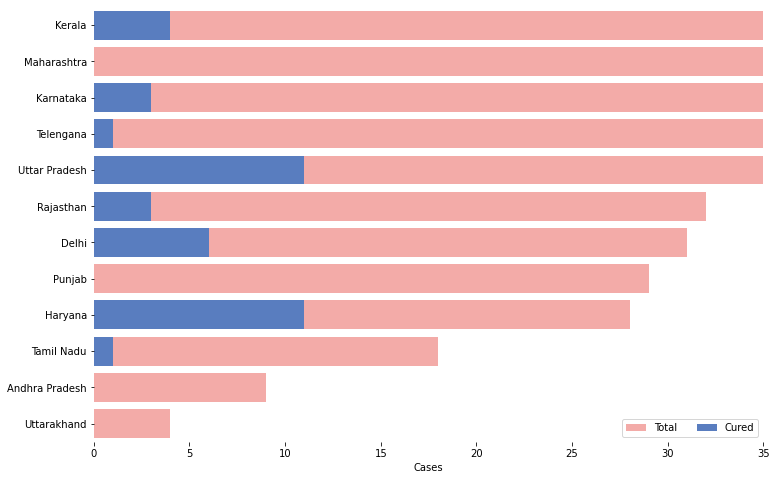

In [ ]:
#Visualization
#Confirmed VS Recovered
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

# **Coronavirus Cases Increasing**

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
dbd_India = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# **Forecasting total no. of cases**

In [ ]:
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [ ]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [ ]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


Visualizing worldwide cases

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [ ]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


Confirmed cases

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872974,336332.073193,376335.096889
65,2020-03-27,372235.326938,349452.170367,393296.647561
66,2020-03-28,388674.964142,367796.026716,409798.427799
67,2020-03-29,405307.954675,383391.382736,427348.233459
68,2020-03-30,418529.648466,395560.820263,441703.773668


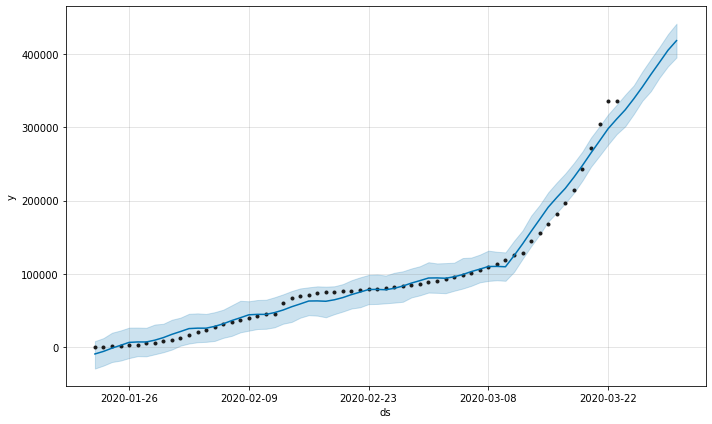

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

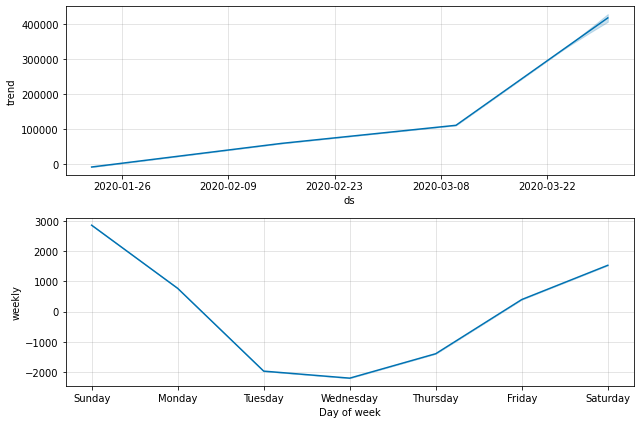

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

Death Cases

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14523.253645,16386.551390
65,2020-03-27,16199.617603,15282.178564,17189.601533
66,2020-03-28,17006.904589,15974.658755,17979.717141
67,2020-03-29,17831.505383,16870.497740,18831.420605
68,2020-03-30,18490.986176,17454.689660,19575.487629


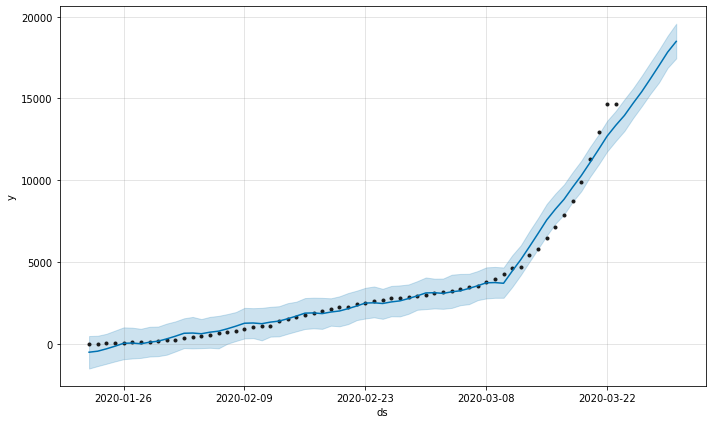

In [ ]:
deaths_forecast_plot = m.plot(forecast)

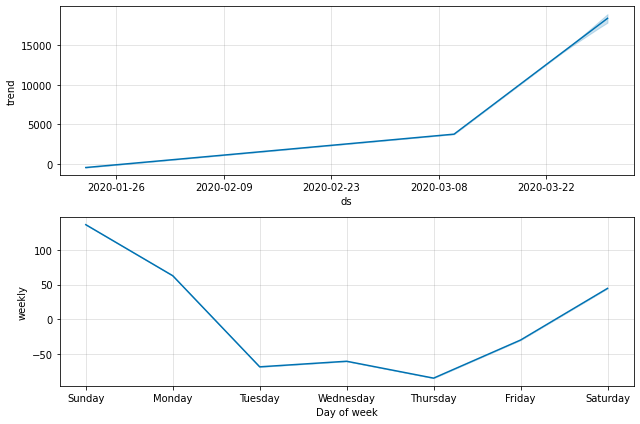

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

Recovered Cases

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.349375,101234.638929,104723.248402
65,2020-03-27,105338.022248,103344.387439,107318.868090
66,2020-03-28,108256.307711,106092.658664,110390.717996
67,2020-03-29,111119.292707,108500.739664,113671.432072
68,2020-03-30,113244.957967,110191.700550,115874.772611


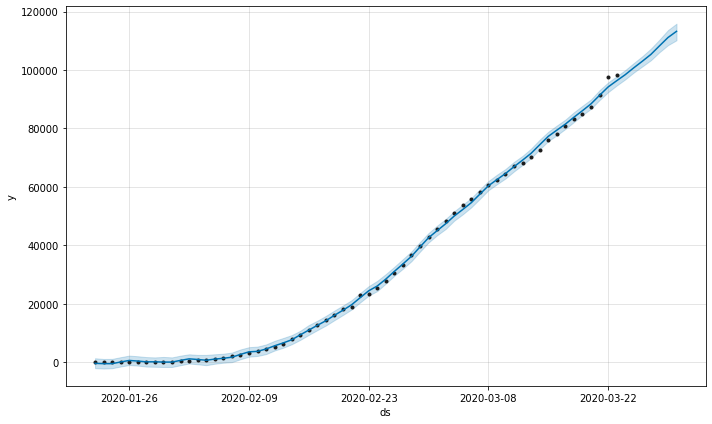

In [ ]:
recovered_forecast_plot = m.plot(forecast)

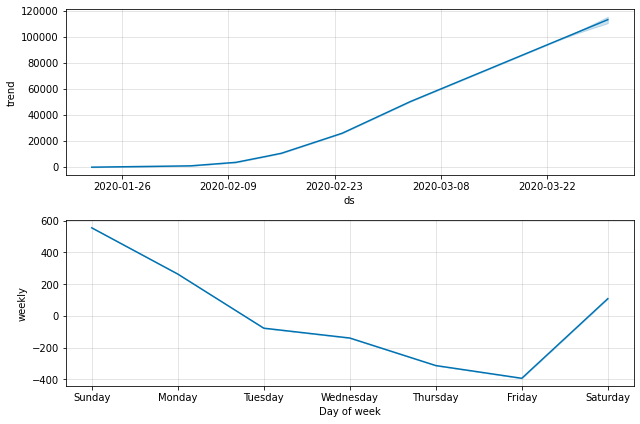

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)